In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mne
import pandas as pd
import xlrd
from mne.datasets import sample
from mne import read_evokeds

In [2]:
need_draw = ['Fp1', 'Fpz', 'Fp2']
# need_draw = ['Fp1']
channel_names = ['Fp1','Fp2','F7','F3','Fz','F4','F8','FC5','FC1','FC2','FC6','T7','C3',
           'Cz','C4','T8','TP9','CP5','CP1','CP2','CP6','TP10','P7','P3','Pz','P4',
           'P8','PO9','O1','Oz','O2','PO10','AF7','AF3','AF4','AF8','F5','F1','F2',
           'F6','FT9','FT7','FC3','FC4','FT8','FT10','C5','C1','C2','C6','TP7','CP3',
           'CPz','CP4','TP8','P5','P1','P2','P6','PO7','PO3','POz','PO4','PO8','Fpz',
           'F9','AFF5h','AFF1h','AFF2h','AFF6h','F10','FTT9h','FTT7h','FCC5h','FCC3h',
           'FCC1h','FCC2h','FCC4h','FCC6h','FTT8h','FTT10h','TPP9h','TPP7h','CPP5h',
           'CPP3h','CPP1h','CPP2h','CPP4h','CPP6h','TPP8h','TPP10h','POO9h','POO1',
           'POO2','POO10h','Iz','AFp1','AFp2','FFT9h','FFT7h','FFC5h','FFC3h','FFC1h',
           'FFC2h','FFC4h','FFC6h','FFT8h','FFT10h','TTP7h','CCP5h','CCP3h','CCP1h',
           'CCP2h','CCP4h','CCP6h','TTP8h','P9','PPO9h','PPO5h','PPO1h','PPO2h','PPO6h',
           'PPO10h','P10','I1','OI1h','OI2h','I2']

In [3]:
index_list = [channel_names.index(i) for i in need_draw]
data_list = [1 if i in index_list else 0 for i in range(128)]

# create info object to create an Epoch object by using mne.create_info
# # sample frequency
frequency = 1000
# # channels name
signal_data_path = r'D:\project\BrainEEG\GrdProject\Visualization\signal_data'
tmp_data_file = f'{signal_data_path}\\{os.listdir(signal_data_path)[0]}'
csv_data = pd.read_csv(tmp_data_file)
channels = pd.DataFrame(columns=csv_data.columns)
ch_names = [i for i in channels]
info = mne.create_info(ch_names=ch_names, ch_types='eeg', sfreq=frequency)

# # channels positions
pos_data_file = r'D:\project\BrainEEG\GrdProject\Visualization\pos.xls'
csv_data = pd.read_excel(pos_data_file)
pos_data = csv_data.loc[:, :].to_numpy()
ch_pos = {ch_names[i]:pos_data[i] for i in range(128)}

In [62]:
na = np.array([1, 0, 0])
lp = np.array([0, 1, 0])
rp = np.array([0, -1, 0])
a = mne.channels.make_dig_montage(ch_pos, nasion=na, lpa=lp, rpa=rp)
info.set_montage(a)
aaaa = np.array(data_list)

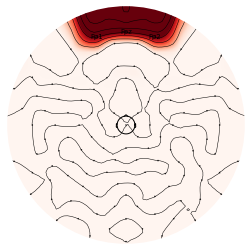

In [63]:
mne.viz.plot_topomap(aaaa, info,names=[ch_names[i] if i in index_list else '' for i in range(128)], show_names=True,show=False)
plt.show()

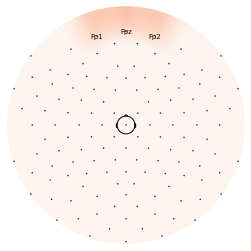

In [64]:
mne.viz.plot_topomap(aaaa, info, sensors=True, 
                     names=[ch_names[i] if i in index_list else '' for i in range(128)], 
                     show_names=True, contours=0, show=False,vmin=0,vmax=8,
                     mask=None,outlines= 'head'
                     )
plt.show()
# vmax 修改通道处红色的深浅
# vmin 修改底色

In [39]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

<Evoked | '' (average, N=1), [0, 0] sec, 64 ch, ~91 kB>

In [40]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
pos = np.stack([biosemi_montage.get_positions()['ch_pos'][ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['0.00000', '0.00000', '-0.00332', '0.09494']


Text(0.5, 1.0, 'MNE channel projection')

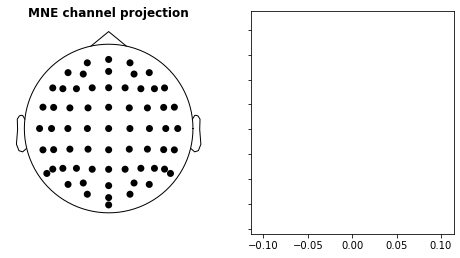

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
fake_evoked.plot_sensors(axes=ax[0], show=False)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
